Load Data

In [1]:
import glob
import numpy as np
import tensorflow.keras as tk
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import roc_auc_score
import zipfile


In [2]:
#path_predictions = "/Users/dakota/Downloads/AR_085Lonoke_Compressed_06-14-2022-10-38 2/predict_tif_superpixel/*.zip"
path_predictions = "/Users/dakota/Downloads/oldfiles2/predict_superpixels/"
path_labels = "/Volumes/Research/CropContour/Code/55TilesTest/data/*_Mask.tif"
path_extracted = "/Users/dakota/Downloads/AR_085Lonoke_Compressed_06-14-2022-10-38 2/predict_tif_superpixel/"

In [22]:
Y_pred = []
Y_test = []
X = []

In [23]:
#tile_numbers = sorted(["064", '065', '066', '067', '068', '076','077','078','085','086','087','088','096','097','099','102'])
tile_numbers = ["039",'052','065', '076', '087', '066', '077', '088', '054', '067', '078', '089', '068','079', '015'] #NO 99 counterpart

In [190]:
'''
#Extract
for f in sorted(glob.glob(path_predictions)):
    pred = os.path.basename(f).replace("AR_Lonoke_15N_","").replace("_predict.zip","")
    if pred in tile_numbers:
        with zipfile.ZipFile(f,'r') as zip_ref:
            zip_ref.extractall(path_extracted)
'''

'\n#Extract\nfor f in sorted(glob.glob(path_predictions)):\n    pred = os.path.basename(f).replace("AR_Lonoke_15N_","").replace("_predict.zip","")\n    if pred in tile_numbers:\n        with zipfile.ZipFile(f,\'r\') as zip_ref:\n            zip_ref.extractall(path_extracted)\n'

In [24]:
offset = 0
for i in range(len(tile_numbers)):
    pred = path_predictions + "/AR_Lonoke_15N_"+ tile_numbers[i-offset]  + "_tf1_superpixel.npz"
    print(pred)
    arr = np.load(pred)
    Y_pred.append(np.asarray(arr['mask']))

/Users/dakota/Downloads/oldfiles2/predict_superpixels//AR_Lonoke_15N_039_tf1_superpixel.npz
/Users/dakota/Downloads/oldfiles2/predict_superpixels//AR_Lonoke_15N_052_tf1_superpixel.npz
/Users/dakota/Downloads/oldfiles2/predict_superpixels//AR_Lonoke_15N_065_tf1_superpixel.npz
/Users/dakota/Downloads/oldfiles2/predict_superpixels//AR_Lonoke_15N_076_tf1_superpixel.npz
/Users/dakota/Downloads/oldfiles2/predict_superpixels//AR_Lonoke_15N_087_tf1_superpixel.npz
/Users/dakota/Downloads/oldfiles2/predict_superpixels//AR_Lonoke_15N_066_tf1_superpixel.npz
/Users/dakota/Downloads/oldfiles2/predict_superpixels//AR_Lonoke_15N_077_tf1_superpixel.npz
/Users/dakota/Downloads/oldfiles2/predict_superpixels//AR_Lonoke_15N_088_tf1_superpixel.npz
/Users/dakota/Downloads/oldfiles2/predict_superpixels//AR_Lonoke_15N_054_tf1_superpixel.npz
/Users/dakota/Downloads/oldfiles2/predict_superpixels//AR_Lonoke_15N_067_tf1_superpixel.npz
/Users/dakota/Downloads/oldfiles2/predict_superpixels//AR_Lonoke_15N_078_tf1_sup

In [192]:
print(len(Y_pred))

16


In [193]:
'''
#Collect Predictions
for f in sorted(glob.glob(path_extracted + "*.tif")):
    pred = os.path.basename(f).replace("AR_Lonoke_15N_","").replace("_predict.tif","")
    if pred in tile_numbers:
        print(f)
        img = Image.open(f)
        Y_pred.append(np.asarray(img))
'''

'\n#Collect Predictions\nfor f in sorted(glob.glob(path_extracted + "*.tif")):\n    pred = os.path.basename(f).replace("AR_Lonoke_15N_","").replace("_predict.tif","")\n    if pred in tile_numbers:\n        print(f)\n        img = Image.open(f)\n        Y_pred.append(np.asarray(img))\n'

In [25]:
#Collect Labels
for f in sorted(glob.glob(path_labels))[1:]:
    #print(f)
    if "99" in f:
        print(f)
        continue
    img = Image.open(f)
    Y_test.append(np.asarray(img))

img = Image.open(sorted(glob.glob(path_labels))[0])
Y_test.append(np.asarray(img))

/Volumes/Research/CropContour/Code/55TilesTest/data/Lonoke99_Mask.tif


In [197]:
for f in sorted(glob.glob(path_labels))[1:]:
    print(f)
    img = Image.open(f.replace("_Mask",""))
    X.append(np.asarray(img))

img = Image.open(sorted(glob.glob(path_labels))[0].replace("_Mask",""))
X.append(np.asarray(img))

/Volumes/Research/CropContour/Code/55TilesTest/data/Lonoke64_Mask.tif
/Volumes/Research/CropContour/Code/55TilesTest/data/Lonoke65_Mask.tif
/Volumes/Research/CropContour/Code/55TilesTest/data/Lonoke66_Mask.tif
/Volumes/Research/CropContour/Code/55TilesTest/data/Lonoke67_Mask.tif
/Volumes/Research/CropContour/Code/55TilesTest/data/Lonoke68_Mask.tif
/Volumes/Research/CropContour/Code/55TilesTest/data/Lonoke76_Mask.tif
/Volumes/Research/CropContour/Code/55TilesTest/data/Lonoke77_Mask.tif
/Volumes/Research/CropContour/Code/55TilesTest/data/Lonoke78_Mask.tif
/Volumes/Research/CropContour/Code/55TilesTest/data/Lonoke85_Mask.tif
/Volumes/Research/CropContour/Code/55TilesTest/data/Lonoke86_Mask.tif
/Volumes/Research/CropContour/Code/55TilesTest/data/Lonoke87_Mask.tif
/Volumes/Research/CropContour/Code/55TilesTest/data/Lonoke88_Mask.tif
/Volumes/Research/CropContour/Code/55TilesTest/data/Lonoke96_Mask.tif
/Volumes/Research/CropContour/Code/55TilesTest/data/Lonoke97_Mask.tif
/Volumes/Research/Cr

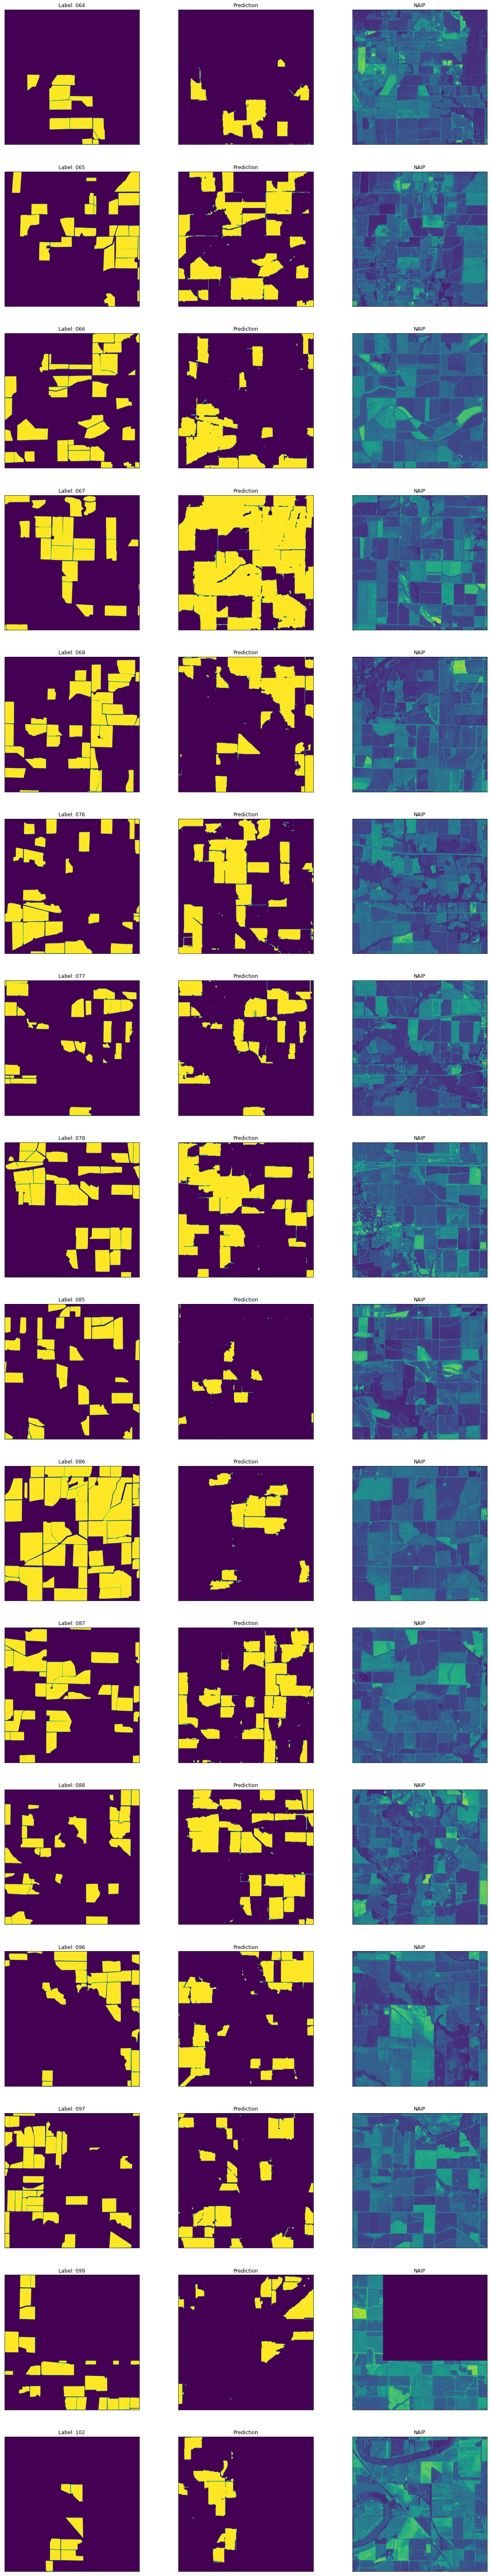

In [203]:
fig, ax = plt.subplots(16,3, figsize=(21,112))
for i in range(16):
    ax[i,0].imshow(Y_test[i])
    ax[i,0].set_xticks([])
    ax[i,0].set_yticks([])
    ax[i,0].set_title("Label: " + tile_numbers[i])
    ax[i,1].imshow(Y_pred[i])
    ax[i,1].set_xticks([])
    ax[i,1].set_yticks([])
    ax[i,1].set_title("Prediction")
    ax[i,2].imshow(X[i])
    ax[i,2].set_xticks([])
    ax[i,2].set_yticks([])
    ax[i,2].set_title("NAIP")

fig.savefig("studyComparison.png", dpi=300)


In [26]:
from sklearn.metrics import confusion_matrix
def ber(label, logit):
      #print("Label shape: ", label.shape)
      mat= confusion_matrix(label, logit)
      #print(mat)
      if len(mat) == 1:
        return -1
      TN, FP, FN, TP = mat.ravel()
      W = len(label)
      NP = sum(label)
      #print(" NP= ", NP)
      NN = W ** 2 - NP
      #print(" NN= ", NN)
      BER = (1 - .5 * (TP / NP + TN / NN))
      #print("TP =",TP)
      #print("NP =",NP)
      #print("TN =",TN)
      #print("NN =",NN)
      if TP == 0:
        if NP == 1.0:
          BER = 0
        else:
          BER = None
      
      return BER

In [27]:
threshold = 0.7

In [28]:
def thresholdRavel(array):
  newArr = np.copy(array)
  row = newArr.shape
  row = row[0]
  for i in range(row):
    if newArr[i] < threshold:
      newArr[i] = 0
    else:
      newArr[i] = 1
  return newArr

In [29]:
def thresholdArray(array):
  newArr = np.copy(array).ravel()
  row = len(newArr)
  for i in range(row):
      if newArr[i] < threshold:
        newArr[i] = 0
      else:
        newArr[i] = 1
  return newArr

In [30]:
print(np.array(Y_pred).shape)
print(np.array(Y_test).shape)

(15, 5000, 5000)
(15, 5000, 5000)


In [31]:
Y_pred =  thresholdArray(np.array(Y_pred))
Y_test = np.array(Y_test)

In [32]:
print(max(Y_test.ravel()))

2


In [33]:
Y_test_fixed = np.array([0 if i == 0 else 1 for i in Y_test.ravel()])

In [34]:
import statistics
print("Overall ")
print(" Accuracy: ", accuracy_score(Y_test_fixed,Y_pred))
print(" F1: ", f1_score(Y_test_fixed,Y_pred))
print(" IOU: ",jaccard_score(Y_test_fixed,(Y_pred)))
print(" BER: ",ber(Y_test_fixed,Y_pred))
print("AUC: ",roc_auc_score(Y_test_fixed,Y_pred))

Overall 
 Accuracy:  0.9439172933333333
 F1:  0.8869196678721554
 IOU:  0.7968155058284567
 BER:  0.5406021005685449
AUC:  0.9353094975552729
